In [1]:

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/mnt/tsv/smeared_100_100_100_1/no_digit/pp_smeared_100_100_100.csv")
df['class_label'] = np.argmax(df[['label_proton','label_pion']].values, axis=1)
df=df.drop(['label_proton', 'label_pion',"time0"], axis=1)

X = df.drop(['class_label'], axis=1)  # Features
y = df['class_label']               # Target labels

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 


In [4]:

dtrain = xgb.DMatrix(X_train, label=y_train)



params = {
    'objective': 'multi:softmax',  
    'num_class': 2,               
    'eval_metric': 'mlogloss',    
    'eta': 0.1,                  
    'max_depth': 8,              
    'subsample': 0.8,            
    'colsample_bytree': 0.8        
}


num_rounds = 200  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds)


In [5]:

dtest = xgb.DMatrix(X_test)


y_pred = bst.predict(dtest)


y_pred = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 60.97%


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(classification_report(y_test, y_pred))


[[6632 3368]
 [4439 5561]]
              precision    recall  f1-score   support

           0       0.60      0.66      0.63     10000
           1       0.62      0.56      0.59     10000

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



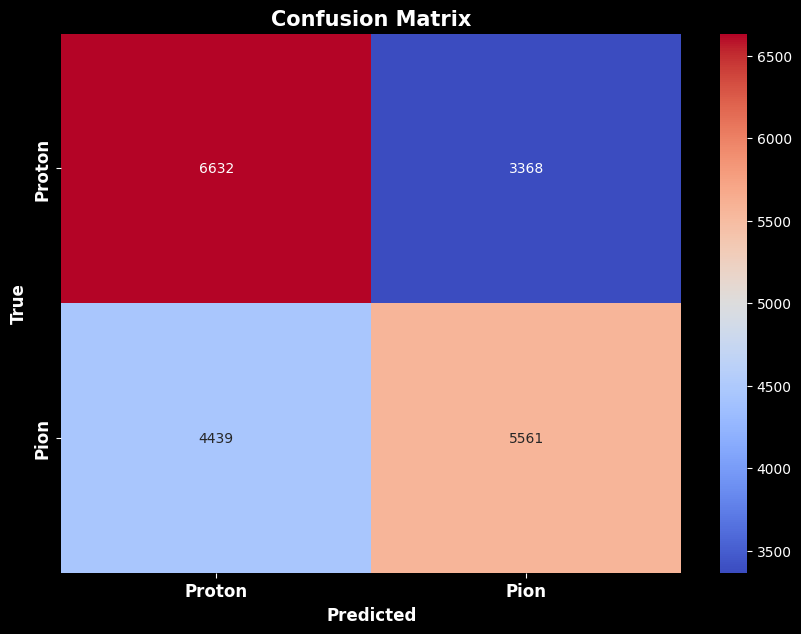

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 7))
plt.style.use('dark_background')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= 'coolwarm', xticklabels=["Proton", "Pion"], yticklabels=["Proton", "Pion"])
plt.xticks(size=12,   weight='bold')
plt.yticks(size=12, weight='bold')
plt.title('Confusion Matrix',size=15,weight='bold')
plt.xlabel('Predicted',size=12,weight='bold')
plt.ylabel('True',size=12,weight='bold')
plt.show()
plt.savefig('/mnt/plots/confusion_matrix_50_50_50_pp.pdf')

In [ ]:
importances = bst.get_score(importance_type='weight')
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=False)}
f=list(importances.keys())
f.reverse()
f

In [ ]:


plt.figure(figsize=(9, 11))

importances = {k: v/sum(importances.values()) for k, v in importances.items()}
plt.barh(range(len(importances)), list(importances.values()), align='center')


plt.yticks(range(len(importances)), list(importances.keys()))
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.title('Feature importances using XGBoost',size=15,weight='bold')

plt.xlabel('Feature importance',size=15,weight='bold')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 15))


importances = {k: v / sum(importances.values()) for k, v in importances.items()}
norm = plt.Normalize(min(importances.values()), max(importances.values()))
cmap = plt.get_cmap('viridis')
colors = cmap(norm(list(importances.values())))
bars = plt.barh(range(len(importances)), list(importances.values()), color=colors, align='center')
plt.yticks(range(len(importances)), list(importances.keys()), weight='bold')
plt.xticks(weight='bold')
plt.title('Feature Importances Using XGBoost', size=15, weight='bold')
plt.xlabel('Feature Importance', size=15, weight='bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
plt.colorbar(sm,ax=plt.gca(),orientation='horizontal')

plt.show()

